In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import StandardScaler
features=['sepal_length','sepal_width','petal_length','petal_width']
#seperating out features
x=df.loc[:,features].values
#seperating out the target
y=df.loc[:,['species']].values
# Standardizing the features
x=StandardScaler().fit_transform(x)

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2','principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [6]:
finalDf=pd.concat([principalDf,df[['species']]],axis=1)
finalDf

,principal component 1,principal component 2,principal component 3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


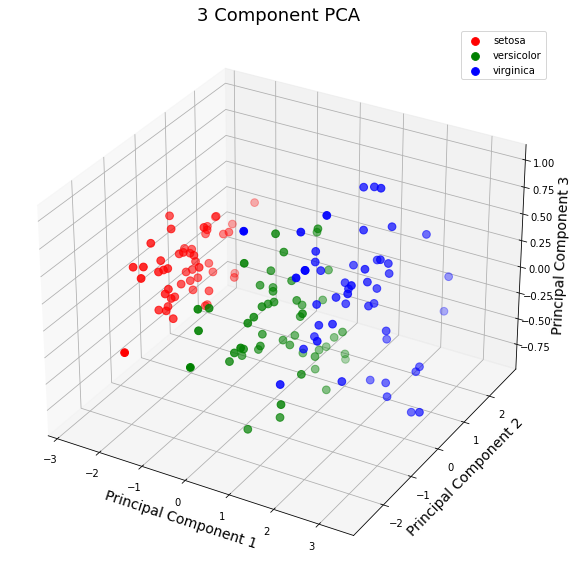

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax= fig.add_subplot(111,projection='3d')

ax.set_xlabel('Principal Component 1',fontsize=14)
ax.set_ylabel('Principal Component 2',fontsize=14)
ax.set_zlabel('Principal Component 3',fontsize=14)
ax.set_title('3 Component PCA',fontsize=18)
targets=['setosa','versicolor','virginica']
colors=['r','g','b']

for target,color in zip(targets,colors):
    indicesToKeep= finalDf['species']== target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
              c=color,s=60)
    
ax.legend(targets)
plt.show()